## **Question 1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
dataset1 = pd.read_csv("/content/drive/MyDrive/prml/lab-4/Iris.csv")
dataset1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
dataset1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### **Preprocessing the data, Visualising and Splitting**

' Since all the values are given there are no empty values'

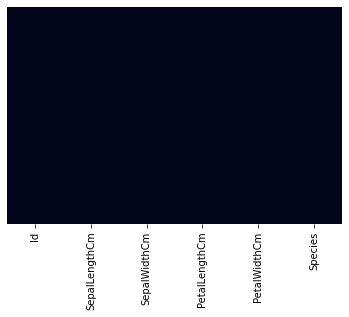

In [6]:
#Checking the empty values in columns
dataset1.isnull()
sns.heatmap(dataset1.isnull(),yticklabels=False,cbar=False)
''' Since all the values are given there are no empty values'''

In [7]:
#Dropping the Id column since it is not necessary
dataset1.drop('Id',axis=1,inplace=True)
dataset1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64


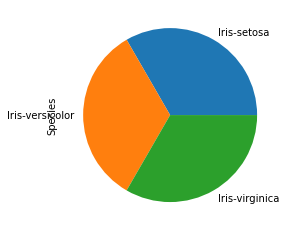

In [8]:
#Since there are no empty values and all the values are integers, there is no need to perform any particular data preprocessing
print(dataset1['Species'].value_counts()/len(dataset1))
fig,ax= plt.subplots()
dataset1['Species'].value_counts().plot(ax=ax, kind='pie')
plt.show()

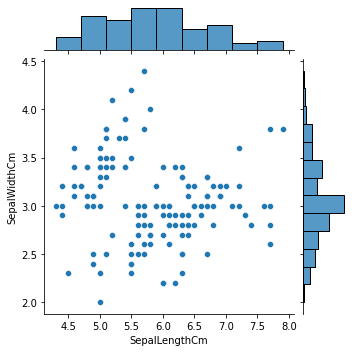

In [9]:
#Bivariate scatterplots and univariate histograms between SepalWidth and SepalLength
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=dataset1, height=5)
plt.show()

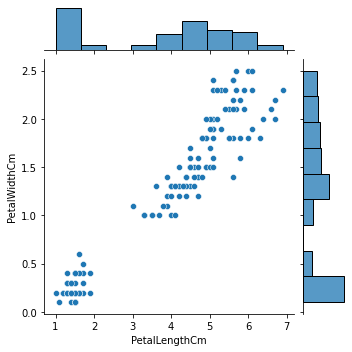

In [10]:
#Bivariate scatterplots and univariate histograms between PetalWidth and PetalLength
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=dataset1, height=5)
plt.show()

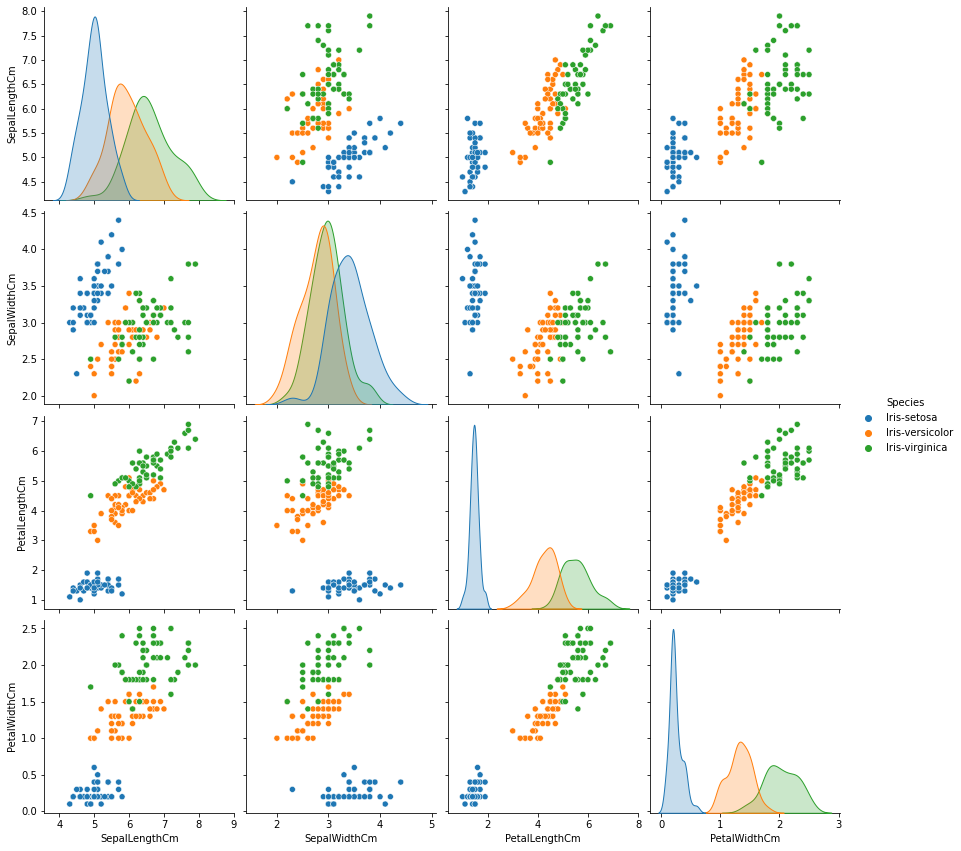

In [11]:
sns.pairplot(dataset1, hue="Species", height=3)
plt.show()

In [12]:
dataset1 = dataset1.replace({'Species': {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica':2}})
dataset1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### **Splitting Dataset**

In [42]:
from sklearn.model_selection import train_test_split
# Split the data into a training set and a test set
X = dataset1.drop('Species',axis=1)
y = dataset1['Species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### **Gaussian Bayes Classifier from Scratch**

In [61]:
class GaussianBayesClassifier():
  
  def __init__(self):
    # self.case = case
    self.feature=None
    self.mean_p=None
    self.mean_q=None
    self.mean_n=None
    self.std_p=None
    self.std_q=None
    self.std_n=None
    self.prior_p=None
    self.prior_q=None
    self.prior_n=None

  def fit(self,x,y):
      p = x[y==1]
      n = x[y==0]
      q = x[y==2]
      self.prior_p = np.sum(p)/dataset1.shape[0]
      self.prior_q = np.sum(q)/dataset1.shape[0]
      self.prior_n = 1- self.prior_p - self.prior_q

      self.feature = []
      self.mean_p = []
      self.std_p = []
      self.mean_n = []
      self.std_n = []
      self.mean_q = []
      self.std_q = []

      for f in x.columns:
        self.feature.append(f)
        self.mean_p.append(np.mean(p[f]))
        self.mean_n.append(np.mean(n[f]))
        self.mean_q.append(np.mean(q[f]))
        self.std_p.append(np.std(p[f]))
        self.std_n.append(np.std(n[f]))
        self.std_q.append(np.std(q[f]))

  def gauss(self,std,mean,x):
      val=((x-mean)/std)**2
      k=np.sqrt(2*np.pi)*std
      sol=np.exp(-0.5*val) 
      return sol/k 

  def predict(self,x):
         prediction=[]
         prob=[]
         residue=[]

         num, feats = x.shape
         for i in range(num):
           like_p=1
           like_n=1
           like_q=1
           row= x.iloc[i,:]
           for fi in range(feats):
             like_p*= self.gauss(self.std_p[fi], self.mean_p[fi], row[fi])
             like_n*= self.gauss(self.std_n[fi], self.mean_n[fi], row[fi])
             like_q*= self.gauss(self.std_q[fi], self.mean_q[fi], row[fi])

          #  prediction.append(1 if like_p>like_n and like_p>like_q else 0)
           if (like_p>=like_q and like_p>=like_n):
              prediction.append(1)
              prob.append(like_p)
              residue.append(like_p)
           elif (like_q>like_p and like_q>like_n):
             prediction.append(2)
             prob.append(like_q)
             residue.append(like_q)
           else:
             prediction.append(0)
             prob.append(like_n)
             residue.append(like_n)
          #  prob.append(like_p if like_p>like_n else like_n)
          #  residue.append(like_p if like_p<=like_n else like_n)

         prob = np.array(prob) / (np.array(prob)+np.array(residue))
         sol = [np.array(prediction),prob]
         return sol
  def train(self,y_pred,y_train):
    accuracy = np.sum(y_pred == y_train)/y_pred.shape[0]
    return accuracy

In [56]:
# Initialize the classifier with type 's2.I'
gb = GaussianBayesClassifier()

# Train the model on training data
gb.fit(X_train, y_train)

# Predict class for a single data point
y_pred_gb = gb.predict(X_train)[0]
y_pred_prob = gb.predict(X_train)[0]

#Test the model 
accuracy = gb.train(y_pred_gb,y_train)
print('Accuracy of model on Train set: ', accuracy)
print(f'Mean Confidence for all predictions: ', np.mean(y_pred_prob))

Accuracy of model on Train set:  0.9428571428571428
Mean Confidence for all predictions:  1.0571428571428572


### **Performing 5 fold Cross-Validation**

In [60]:
from sklearn.model_selection import KFold,cross_val_score

kfold = KFold(n_splits=5, random_state=None, shuffle=True)

#Initializing a list to store the accuracy results
accuracy_results = []

#Copying the data in an array
dataset_copy = np.array(X)

#Looping through each fold
for train_index, test_index in kfold.split(dataset_copy):
  x_train, x_test = dataset_copy[train_index], dataset_copy[test_index]
  Y_train, Y_test = y[train_index], y[test_index]

  #Training the Gaussian Naive Bayes Classifier
  model = GaussianBayesClassifier()
  # model.fit(x_train, Y_train)

  #Making predictions on test data
  Y_predictions = model.predict(x_test)
  p = model.predict(x_test)[1]
  q = model.predict(x_test)[0]
  #Calculating accuracy score
  acc = model.test(Y_predictions,Y_test)

  #Appending the accuracy score to the results list
  accuracy_results.append(acc)
    
print("Accuracy results for 5 fold Cross-validation\n",accuracy_results)
# Calculating the average accuracy across all folds
average_accuracy = np.mean(accuracy_results)
print("\nAverage accuracy:", average_accuracy,'\n\n') 

AttributeError: ignored

 # **Question 2**

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [20]:
##Covariance matrix and mean are given in the question
mean = np.array([0,0])
covariance = np.array([[3/2,1/2],[1/2,3/2]])
print("Mean is: ",mean)
print("Covariance is: \n",covariance)
d = 2 #since the covariance matrix has order 2*2 (d*d), we know that d=2
n=1000 #let us take 1000 samples

Mean is:  [0 0]
Covariance is: 
 [[1.5 0.5]
 [0.5 1.5]]


### **Getting sample random points from the multivariate normal distribution**

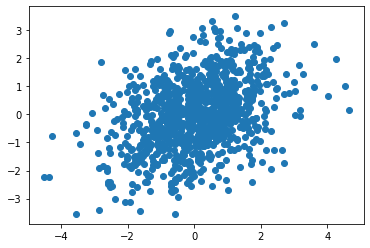

In [21]:
X = np.random.multivariate_normal(mean=mean, cov=covariance, size=n)
x_trans = np.transpose(X)

#Plotting the data points
plt.scatter(X[:,0],X[:,1])

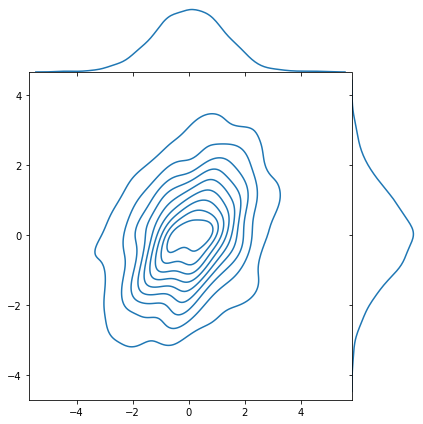

In [22]:
# Plotting density function.
sns.jointplot(x=x_trans[0], y=x_trans[1], kind="kde", space=0);

### **a) Covariance matrix of the sample** 

In [23]:
#Mean of each variable in the sample
mean = np.mean(X, axis=0)
print("Mean of each variable in the sample: ",mean)

#Subtract the mean from each data in the sample to get the centred data
centred_data = X - mean
print("\nCentred sample: \n", centred_data)

#Calculating covariance matrix between each pair of variables
cov_matrix = np.dot(centred_data.T,centred_data) / (X.shape[0]-1)
print("\nCovariance Matrix of the sample: \n",cov_matrix)

Mean of each variable in the sample:  [ 0.0284071  -0.02061931]

Centred sample: 
 [[-0.20200469  0.86896749]
 [ 1.21817182  0.04658548]
 [ 0.32090758  0.47469116]
 ...
 [ 0.37136657 -1.0731831 ]
 [ 1.3136565   1.61433688]
 [-0.12679867 -0.38872549]]

Covariance Matrix of the sample: 
 [[1.58460748 0.59142547]
 [0.59142547 1.51058821]]


In [24]:
from numpy.linalg import eig
eigen_value, eigen_vector = eig(cov_matrix)
print("Eigen Values are: ",eigen_value)
print("\nEigen Vector: \n",eigen_vector)

Eigen Values are:  [2.14018016 0.95501554]

Eigen Vector: 
 [[ 0.7288535  -0.68466968]
 [ 0.68466968  0.7288535 ]]


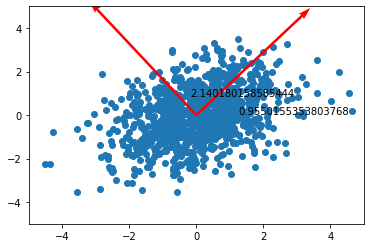

In [25]:
#Plotting the eigenvalues and eigen vectors superimposed on the dataset
#plotting the sample data
plt.scatter(X[:,0],X[:,1])

#Plotting the eigenvectors
for ev in eigen_vector.T:
  plt.quiver(0,0,ev[0],ev[1],color='red',scale=eigen_value[0])

#Plotting the eigenvalues
for i,e_value in enumerate(eigen_value):
  plt.text(X[i,0], X[i,1], str(e_value), color='black', fontsize=10)
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.show()  

### **Perform the transformation and finding the covariance matrix** 

In [26]:
from scipy.linalg import fractional_matrix_power

# Calculate the square root of the covariance matrix
sqrt_cov = fractional_matrix_power(cov_matrix, 0.5)

# Perform the transformation
y = np.dot(X, sqrt_cov)

# Calculate the covariance matrix of the transferred data
mean_y = np.mean(y, axis=0)
print("Mean of each variable in the transformed sample: ",mean_y)

centred_data_y = y - mean_y
print("\nCentred sample: \n", centred_data_y)

cov_matrix_y = np.dot(centred_data_y.T,centred_data_y) / (y.shape[0]-1)
print("\nCovariance Matrix of the transformed sample: \n",cov_matrix_y)

eigen_value, eigen_vector = eig(cov_matrix)
print("\nEigen Values of covariance matrix of Y are: ",eigen_value)
print("\nEigen Vector of covariance matrix of Y: \n",eigen_vector)

Mean of each variable in the transformed sample:  [ 0.03009264 -0.01795972]

Centred sample: 
 [[-0.03891717  0.99808135]
 [ 1.51604853  0.35137932]
 [ 0.51145446  0.64974558]
 ...
 [ 0.19862738 -1.20309785]
 [ 2.01397143  2.26354546]
 [-0.25084426 -0.49911733]]

Covariance Matrix of the transformed sample: 
 [[2.86076496 1.83057756]
 [1.83057756 2.63166082]]

Eigen Values of covariance matrix of Y are:  [2.14018016 0.95501554]

Eigen Vector of covariance matrix of Y: 
 [[ 0.7288535  -0.68466968]
 [ 0.68466968  0.7288535 ]]


### The purpose of transformation is it can be used to rotate or rescale the data in order to allign the principal components of the data with the axes of the plot. This can simplify the visualisation of the data by reducing the dimensionality of the data and highlighting the most important features or patterns in data. It also helps in normaizing the data or to standardize the variables.
### Covariance matrix obtained after transformation has higher values than the previous one.

### **Part C**

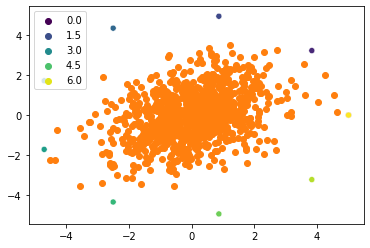

In [27]:
theta = np.linspace(0, 2 * np.pi, 10)
r = np.sqrt(25)
x_dp = r * np.cos(theta)
y_dp = r * np.sin(theta)
P = np.column_stack((x_dp, y_dp))

sns.scatterplot(x=x_dp, y=y_dp, hue=theta, palette='viridis')
plt.scatter(X[:,0],X[:,1])

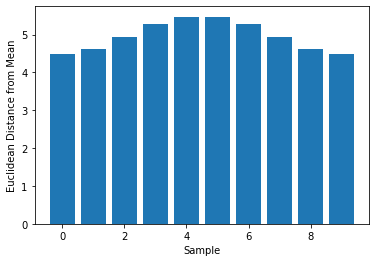

In [28]:
#Plotting the Eucledian distance of each point from mean

mu = np.mean(P, axis=0)
d = np.sqrt(np.sum((P - mu)**2, axis=1))
plt.bar(np.arange(len(d)), d)
plt.xlabel("Sample")
plt.ylabel("Euclidean Distance from Mean")
plt.show()

### **Part d**

In [29]:
#Finding covariance matrix
#We calculated the mean of the data points
#Subtracting the mean from each data point
p_centred = P - mu

covariance_matrix_p = np.cov(p_centred, rowvar=False)
print("Covariance matrix of data points\n",covariance_matrix_p)

Covariance matrix of data points
 [[1.50000000e+01 5.23153433e-16]
 [5.23153433e-16 1.25000000e+01]]


In [30]:
##Transformation of data points and calculating covariance matrix

from scipy.linalg import fractional_matrix_power

# Calculate the square root of the covariance matrix
sqrt_cov_p = fractional_matrix_power(covariance_matrix_p, 0.5)

# Perform the transformation
q_p = np.dot(P, sqrt_cov_p)

# Calculate the covariance matrix of the transferred data
mean_q_p = np.mean(q_p, axis=0)
print("Mean of each variable in the transformed sample: ",mean_q_p)

centred_data_q_p = q_p - mean_q_p
print("\nCentred Sample: \n", centred_data_q_p)

cov_matrix_q_p = np.dot(centred_data_q_p.T,centred_data_q_p) / (q_p.shape[0]-1)
print("\nCovariance Matrix of the transformed dataponts: \n",cov_matrix_q_p)

Mean of each variable in the transformed sample:  [ 1.93649167e+00 -9.30577513e-16]

Centred Sample: 
 [[ 1.74284251e+01  1.28365318e-15]
 [ 1.28978952e+01  1.13629869e+01]
 [ 1.42619083e+00  1.74091060e+01]
 [-1.16189500e+01  1.53093109e+01]
 [-2.01335610e+01  6.04611907e+00]
 [-2.01335610e+01 -6.04611907e+00]
 [-1.16189500e+01 -1.53093109e+01]
 [ 1.42619083e+00 -1.74091060e+01]
 [ 1.28978952e+01 -1.13629869e+01]
 [ 1.74284251e+01 -3.04612710e-15]]

Covariance Matrix of the transformed dataponts: 
 [[2.25000000e+02 1.40680056e-14]
 [1.40680056e-14 1.56250000e+02]]


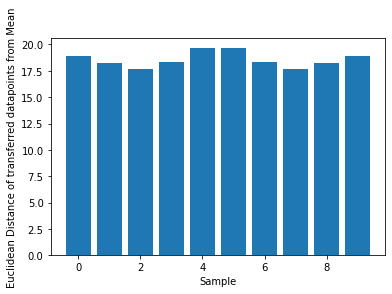

In [31]:
#Calculating Eucledian distance of transformed data points
d_q = np.sqrt(np.sum((q_p - mu)**2, axis=1))

plt.bar(np.arange(len(d_q)), d_q)
plt.xlabel("Sample")
plt.ylabel("Euclidean Distance of transferred datapoints from Mean")
plt.show()

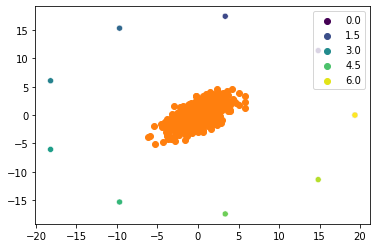

In [32]:
#Plotting points in Q along with datapoints in Y
sns.scatterplot(x=q_p[:,0], y=q_p[:,1], hue=theta, palette='viridis')
plt.scatter(y[:,0],y[:,1])

The graph of Eucledian distance of data points from the mean before was first increasing and decreasing but the grpah of eucledian distance of transferred data points from the mean was like first decreasing, and then increasing and then decreasing and increasing 